# **Analysis of Student Mental Health**
Summer 2025 Data Science Project

Dain Henry,
Mia Walsh,
Nolawe Temketem,
Tony Duran

## **Contributions:**


For each member, list which of the following sections they worked on, and summarize the contributions in 1-2 sentences. Be specific!
##A: Project idea
Dain Henry : I wrote the introduction section, where I laid out the goals and purpose of the analysis. <br>
Mia Walsh : Presented idea of using a mental health dataset and came up with possible questions we could try to answer through analysis paired with certain statistical methods
##B: Dataset Curation and Preprocessing
Tony Duran : Data Curation Writeup <br>
Nolawe Temketem : Found the dataset and did preprocessing to be used for analysis <br>
Mia Walsh : Found first dataset and after preprocessing and careful analysis, the team decided not to use due to the poor presentation of data <br>
##C: Data Exploration and Summary Statistics
Tony Duran : Observed sleep duration and its effect on depression results. Performed a Chi-Squared Test to check proportions of depressed students within each sleep duration bin.<br>

Nolawe Temketem : Did T-test examining the relationship between a student's Work/Study Hours per day and likely hood of depression <br>

Dain Henry : I performed the ANOVA test with Post-Hoc Tukey HSD to answer "Can dietary habits predict academic pressure?"

##D: ML Algorithm Design/Development
Nolawe Temketem : Wrote the code to do classification Machine Learning analysis on our dataframe predicting depression based on key features <br>
##E: ML Algorithm Training and Test Data Analysis

##F: Visualization, Result Analysis, Conclusion
Dain Henry : I made the plot 5-Fold CV Accuracy Comparison and discussed the results of the 5 Fold CV on the 4 models.

Nolawe Temketem: Displayed vizualizations of the top influencing visualization of the top influencing features. for Random Forest <br>

Mia Walsh : Insights and Conclusions
##G: Final Tutorial Report Creation
##H: Additional (not listed above)



# **Introduction**

 The topic for this data analysis is related to college student depression. Our dataset includes large amounts of relavent information that we will use to determine correlations, and to try to predict whether a student is experiencing depression.<br><br>

**Some questions we hope to answer through this analysis:**


Can we accurately predict student depression based on lifestyle and academic factors?

Which combination of features best indicates whether a student is likely to suffer from depression?

Which machine learning model performs best for this prediction task (e.g., Logistic Regression, Random Forest, KNN)?


Is there a dependent relationship between a student's usual sleep duration and if that student has depression?

What is the distribution of students' Work/Study Hours in this data set and is there a correlation between Work/Study Hours and students who are depressed?

Can dietary habits predict academic pressure?

<br>


 Using the information we aquire while attempting to answer these questions will give us insight into which features of the dataset are statistically significant. Building off of our findings, we will test various machine learning models to try to determine whether it is possible to predict whether or not a student has depression based on some features in the dataset.

<br>

 Depression is a serious issue among college students today. A large amount of university resources are dedicated to reducing depression within the student body to promote a healthier and more successful outcome for the students. Even with these measures in place, it can be extremely beneficial to further analyze trends to determine exactly which external factors can be influencing the high depression rate. Through the use of EDA and ML, we hope that our analysis can  pinpoint the primary causes that make this rate so high. Gaining information on which factors influence depression the most can help people to become more aware and be able to better treat and reduce depression.


# **Data Curation**

[We used a dataset from Kaggle ](https://www.kaggle.com/datasets/adilshamim8/student-depression-dataset)that has 27,870 student records and 18 features related to mental health, academic performance, and lifestyle. Each row represents a student and includes data such as age, gender, CGPA, sleep duration, work/study hours, dietary habits, financial stress, and depression status, which was our target variable. <br><br>
To prepare the dataset for analysis, we:
* **Loaded the CSV into a Pandas DataFrame**
* **Removed rows with unavailable or missing values** in columns, so that the dataset was complete and clean for analysis (e.g., .dropna()).
* **Cleaned formatting issues** in categorical fields like Sleep Duration and Dietary Habits, which included stray quotation marks (e.g., '6 to 7 hours' → 6 to 7 hours)
* **Mapped categorical inputs:** Sleep Duration and Dietary Habits were mapped from  strings to numeric codes using dictionaries (e.g., “Unhealthy” = 0)

<br>

These transformations and curations were done throughout different stages of the project. Most occurred during initial exploration, while others were applied later during ML model setup.


# **Exploratory data analysis**

## **Data Preprocessing**


For Checkpoint 2 we ended up switching to a [new dataset](https://www.kaggle.com/datasets/adilshamim8/student-depression-dataset/data.)


This Dataset, with about 28,000 student records compared to 1,000 students, is a better choice for our project analysis due to its scale and depth. It's larger size provides stronger statistical power, making hypothesis testing (like t-tests) more reliable and generalizable.

It includes a depression label, which is needed for comparing mental health outcomes across different work and study hours levels. This is something the other dataset lacked. This aligns with the project’s goal understanding students mental health.

In short, Dataset 1 directly supports our project’s core question better and provides the depth and structure needed for meaningful, statistically sound insights.

In [45]:
# Core Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import ast

# System & Plot Settings
pd.set_option('display.max_columns', None)
np.set_printoptions(threshold=np.inf)
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn")

# Statistical Analysis
import scipy.stats as stats
from scipy.stats import ttest_ind
from scipy.spatial.distance import cdist

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm

# Google Colab
from google.colab import drive

# scikit-learn: Preprocessing & Model Evaluation
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler, normalize
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix,
    ConfusionMatrixDisplay, silhouette_score
)

# scikit-learn: Models
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Clustering & Dimensionality Reduction
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Visualization Extras
import matplotlib
from matplotlib.colors import Normalize
from matplotlib.lines import Line2D
import plotly.graph_objects as go
import plotly.express as px




pd.set_option('display.max_rows', 30)
pd.set_option('display.max_columns', 20)
pd.set_option('display.max_colwidth', 20)
pd.set_option('future.no_silent_downcasting', True)


drive.mount("/content/drive", force_remount=True)

# NEW DF
# https://www.kaggle.com/datasets/adilshamim8/student-depression-dataset/data

new_df = pd.read_csv('/content/drive/MyDrive/GroupProject_MentalHealthAnalysis/student_depression_dataset.csv')


new_df = new_df[new_df['Profession'] == 'Student']

# Convert Yes/No to 1/0
yes_no_cols = ['Have you ever had suicidal thoughts ?','Family History of Mental Illness']
new_df[yes_no_cols] = new_df[yes_no_cols].replace({'Yes': 1, 'No': 0})

new_df = new_df.dropna()

new_df = new_df.replace('?', np.nan)
new_df = new_df.replace('?', np.nan)
new_df = new_df.dropna()

new_df

Mounted at /content/drive


,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,1,3.0,1.0,0,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,0,3.0,2.0,1,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,0,9.0,1.0,1,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,1,4.0,5.0,1,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,1,1.0,1.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,140685,Female,27.0,Surat,Student,5.0,0.0,5.75,5.0,0.0,'5-6 hours',Unhealthy,'Class 12',1,7.0,1.0,1,0
27897,140686,Male,27.0,Ludhiana,Student,2.0,0.0,9.40,3.0,0.0,'Less than 5 hours',Healthy,MSc,0,0.0,3.0,1,0
27898,140689,Male,31.0,Faridabad,Student,3.0,0.0,6.61,4.0,0.0,'5-6 hours',Unhealthy,MD,0,12.0,2.0,0,0
27899,140690,Female,18.0,Ludhiana,Student,5.0,0.0,6.88,2.0,0.0,'Less than 5 hours',Healthy,'Class 12',1,10.0,5.0,0,1


## **Data Exploration and Summary Statistics**



This dataset compiles a wide range of information aimed at understanding, analyzing, and predicting depression levels among students.It has 18 features, and 27870 entries where each row represents an individual student.



**ID:** Unique identifier for each student

**Demographics:** Age, Gender, City

**Academic Indicators:** CGPA, Academic Pressure, Study Satisfaction

**Lifestyle & Wellbeing:** Sleep Duration, Dietary Habits, Work Pressure, Job Satisfaction, Work/Study Hours

**Additional Factors:** Profession, Degree, Financial Stress, Family History of Mental Illness, and whether the student has ever had suicidal thoughts

**Target Variable:** Depression_Status

### **Sleep Duration**



**Note:** We are looking to see if there is a noticable correlation between sleep duration and depression

In [46]:
d_counts = new_df.groupby('Sleep Duration')['Depression'].sum()

display(d_counts) # Depression sum after sorting dataframe by sleepduration

others_df = new_df[new_df['Sleep Duration'] == 'Others'].shape[0]
print("\nAmount of 'Other' Students for Sleep Duration: " + str(others_df))

filtering_others_df = new_df[new_df['Sleep Duration'] != 'Others'].copy()

filtering_others_df['Depression'] = filtering_others_df['Depression'].replace({1: 'Yes', 0 : 'No'})

,Depression
Sleep Duration,
'5-6 hours',3512
'7-8 hours',4362
'Less than 5 hours',5354
'More than 8 hours',3070
Others,9



Amount of 'Other' Students for Sleep Duration: 18


**Notes**:

Above we dropped the 'others' cateogory as we would not know which categories to put these students in. The sleep duration answer choices covered all posible inputs - it is not like we only recorded a limited range. There are 18 people in this category which accounts for \< 1% of the data so its negligible.

In [47]:
filtering_others_df = new_df[new_df['Sleep Duration'] != 'Others'].copy()

filtering_others_df['Depression'] = filtering_others_df['Depression'].replace({1: 'Yes', 0 : 'No'})

rename = {"'Less than 5 hours'" : "< 5 hrs" , "'5-6 hours'"  : "5-6 hrs", "'7-8 hours'" : "7-8 hrs", "'More than 8 hours'" : "> 8 hrs"}

sleep_col = filtering_others_df['Sleep Duration'].replace(rename)
depression_col = filtering_others_df['Depression']
contingency_table_no_totals = pd.crosstab(sleep_col, depression_col) # No Margins

set_index = ["< 5 hrs", "5-6 hrs", "7-8 hrs", "> 8 hrs"]
contingency_table_no_totals = contingency_table_no_totals.reindex(set_index) # Optimal Order

table = contingency_table_no_totals.reset_index() # We want Sleep Duration to be a column

acc_lst = []
for index, row in table.iterrows():
  acc_lst.append(((row['Yes']/(row['No'] + row['Yes'])) * 100))

table['Percentage Depressed'] = acc_lst

table

Depression,Sleep Duration,No,Yes,Percentage Depressed
0,< 5 hrs,2948,5354,64.490484
1,5-6 hrs,2663,3512,56.874494
2,7-8 hrs,2975,4362,59.452092
3,> 8 hrs,2965,3070,50.869925


**Note:** Above are the splits for each column . We can see the proportions vary across the groups from having 50 - 65 percentish

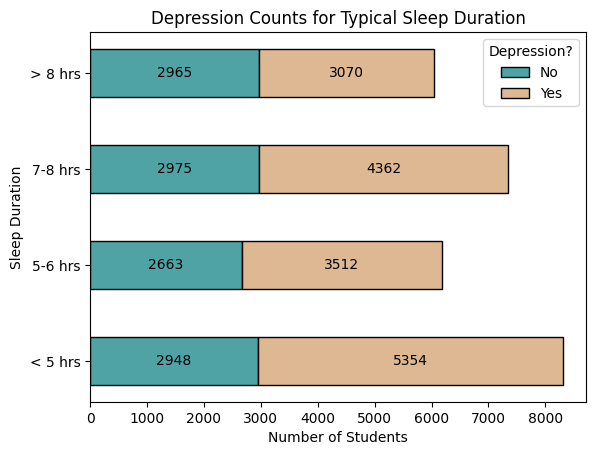

In [48]:
# https://youtu.be/MkQQQwCIddw?si=IgboQjTv9q5idGvB

# Horizontal Stacked Bar Chart

sleep_duration = table['Sleep Duration']

left = [0] * len(table)

for diagnosis in ['No', 'Yes']: # Iterating across the yes and no column

  if diagnosis == 'No': # Setting Color
    color = '#4FA3A5'
  else:
    color = '#DDB892'

  container = plt.barh(sleep_duration, table[diagnosis], left=left, label=diagnosis, color=color, height=.5, edgecolor='black')
  plt.bar_label(container, label_type='center')
  left = [i + j for i,j in zip(left,table[diagnosis])]

plt.xlabel('Number of Students')
plt.ylabel('Sleep Duration')
plt.title('Depression Counts for Typical Sleep Duration')
plt.legend(title = "Depression?")
plt.show()

**Notes:**
Above is a horizontally stacked bar chart showing the divide between each bin.

From the graph we can see:
*  Students sleeping < 5 hours show the **highest** depression proportion (\~64%),
*  While those sleeping > 8 hours show the **lowest** (~51%).

We can also see that the < 5 group had the **most** students in its category.

If we compare the < 5 hrs to 7-8 hours:
*   We can see that the 7-8 hrs bin has **less** overall people (996 people less!)
*   Has a **higher** total of students that fall into the non-depressed category than < 5

Ranking the Categories on Proportion:


1.   \> 8 Hours : 51%
2.   5-6 Hours : 57%
3.   7-8 Hours : 59%
4.   < 5 Hours : 64%

There seems to be a trend with the more sleep leading to a smaller depression rate. The sample doesnt follow this perfectly as 7-8 hrs group in the sample had a rate 2% higher than 5-6 hrs group. The overall movement of the data suggests that **longer durations of sleep** may correlate to having better mental health and lower chance of having depression

**Question:** Is there a dependent relationship between a student's usual sleep duration and if that student has depression

**Null Hypothesis:** Within the population of all students, the range of sleep a student typically gets is independent from whether that student has depression. To put it another way, in every sleep category, the proportion of depressed students is the same as the overall proportion of depressed students in the student population.

**Alternative Hypothesis:** Within the population of all students, the range of sleep a student typically gets is not independent from whether that student has depression. To rephrase, there is at least one Sleep Duration category that displays a different proportion of depressed students than the overall population proportion.

**Statistical Method:** Chi Squared Test

**Note:** Our sample size is around 28,000 which makes the data approximatley normal




In [49]:
nice_order = [
    "'Less than 5 hours'",
    "'5-6 hours'",
    "'7-8 hours'",
    "'More than 8 hours'",
    "Totals"
]

contingency_table = pd.crosstab(filtering_others_df['Sleep Duration'],
                          filtering_others_df['Depression'] ,
                          margins=True, margins_name="Totals")

contingency_table = contingency_table.reindex(nice_order)

display(contingency_table)

Depression,No,Yes,Totals
Sleep Duration,,,
'Less than 5 hours',2948,5354,8302
'5-6 hours',2663,3512,6175
'7-8 hours',2975,4362,7337
'More than 8 hours',2965,3070,6035
Totals,11551,16298,27849


**Note:**

Above is the contingency table for students sleep duration and depression.

In [50]:
observed_table = pd.crosstab(filtering_others_df['Sleep Duration'], filtering_others_df['Depression'])

row_totals = observed_table.sum(axis=1)
col_totals = observed_table.sum(axis=0)
grand_total = observed_table.sum().sum()

# Now it is time to compute the expected values

expected = np.outer(row_totals, col_totals) / grand_total
chi_squared = ((observed_table - expected) ** 2 / expected).sum().sum()
degrees_of_freedom = (observed_table.shape[0] - 1) * (observed_table.shape[1] - 1)
p_value = 1 - stats.chi2.cdf(chi_squared, degrees_of_freedom)

print("Chi Squared:", chi_squared)
print("Degrees of Freedom:", degrees_of_freedom)
print("p-value:", p_value)

Chi Squared: 276.935554991573
Degrees of Freedom: 3
p-value: 0.0


**Conclusion**

Above we got a p value of about zero with our test statistic. This means we will **reject** the null hypothesis (p < .025) which states that usual sleep duration and depression are independent. Our sample strongly suggests a link between the two.

### **Work/Study Hours Relationship with Mental Health**



What is the distribution of students' Work/Study Hours in this data set?

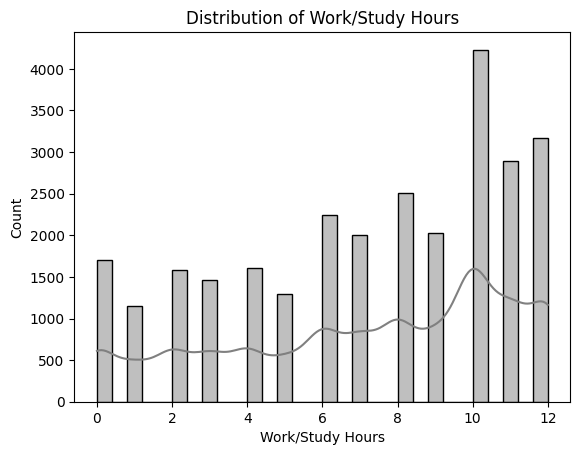

In [51]:
sns.histplot(new_df['Work/Study Hours'], kde=True, bins=30, color='gray')
plt.title("Distribution of Work/Study Hours")
plt.show()

Lets look some summary statistics to see if seems to be some relationship between Working/Study Hours and Depression.  

We can group stundents by hours worked per day and see depression rates among them.

In [52]:
display(new_df.groupby('Work/Study Hours')['Depression'].mean().reset_index())

,Work/Study Hours,Depression
0,0.0,0.354915
1,1.0,0.402439
2,2.0,0.436318
3,3.0,0.473074
4,4.0,0.504035
5,5.0,0.544539
6,6.0,0.573209
7,7.0,0.587706
8,8.0,0.624801
9,9.0,0.599308


We notice there is a higher Depression rate among students that work longer but what does this look like visually?

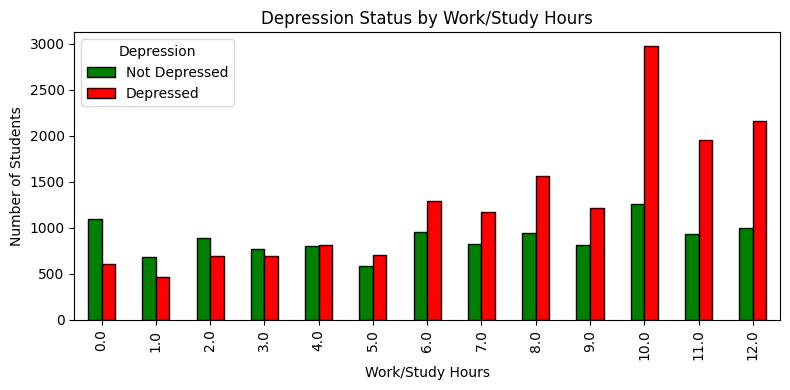

In [53]:
dep_by_whours = new_df.groupby(['Work/Study Hours', 'Depression']).size().unstack(fill_value=0).sort_index()

dep_by_whours.plot(kind='bar', figsize=(8, 4), color=['green', 'red'], edgecolor='black')

plt.xlabel('Work/Study Hours')
plt.ylabel('Number of Students')
plt.title('Depression Status by Work/Study Hours')
plt.legend(['Not Depressed', 'Depressed'], title='Depression')
plt.tight_layout()

plt.show()

There seems to be some sort of positive relationship between Work/Study Hours and Depression, with stundent who work and students more hours on average having higher rates of depression. However, as data Sciencist we must be thorough.


 **Lets run a Hypothesis Test.**

For large sample sizes, like this one where we have (~28,000 students) , the t-test is still valid even if the data isn’t perfectly normal. Thank you Central Limit Theorem!!!



**Null Hypothesis (Ho):**  There is no significant difference in work hours between depressed and non-depressed students.

**Alternative Hypothesis (Ha):** There is a significant difference in work hours.



We'll examine the means then run the t-test.

,Depression,Work/Study Hours
0,0,6.236938
1,1,7.810143


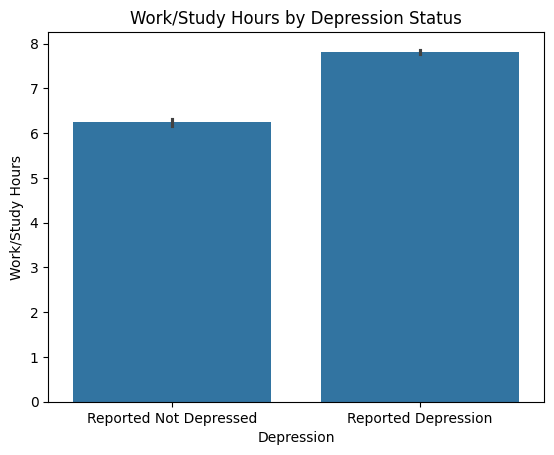

In [54]:
display(new_df.groupby('Depression')['Work/Study Hours'].mean().reset_index())

sns.barplot(data=new_df, x='Depression', y='Work/Study Hours')

plt.xticks([0,1], ['Reported Not Depressed', 'Reported Depression'])
plt.title("Work/Study Hours by Depression Status")
plt.ylabel("Work/Study Hours")
plt.xlabel("Depression")

plt.show()

Now we run the t-test!!!

In [55]:
# Welch's t-test (for unequal variance)

depressed_hours_df = new_df[new_df['Depression'] == 1]['Work/Study Hours']
nondepressed_hours_df = new_df[new_df['Depression'] == 0]['Work/Study Hours']

t_stat, p_val = ttest_ind(depressed_hours_df, nondepressed_hours_df, equal_var=False)

print(f"\nT-statistic: {t_stat:.5f}\n")

print(f"\nP-value: {p_val:.5f}\n")


T-statistic: 35.01412


P-value: 0.00000



**Interpretation**

The t-statistic measures how far apart the two group means are in terms of standard error.

A value of 35.005 is very large, meaning Groups with Depression and Without Depression are very different with respect to working and studying hours.

A p-value this low (rounded to zero) indicates there's virtually zero propability this difference is due to random variation.

We reject the null hypothesis with high-confidence

There is a statistically significant difference in average Work/Study Hours between students with and without depression.

This leads us to conclude that the amount of time a student is working and studying directly impacts the likely hood the are depressed


### **Dietary Habits Due to Acadmeic Pressure**



Question: Can dietary habits predict academic pressure?

Null Hypothesis: There is no difference in academic pressure between students with different dietary habits.

Alternative Hypothesis: At least one dietary group reports a statistically significant difference in academic pressure compared to others.

Method: ANOVA with Post-Hoc TukeyHSD

Why: Academic Pressure is numeric data whereas dietary habits are categorical so ANOVA works best.

Visualization: Box Plot & Tukey HSD CI plot of Academic Pressure by Dietary Habits

Statistical Output:
  - F-value
  - p-value
  - Tukey's HSD




,sum_sq,df,F,PR(>F)
C(DietaryHabits),444.660584,2.0,117.460757,1.589921e-51
Residual,52718.401128,27852.0,NaN,NaN


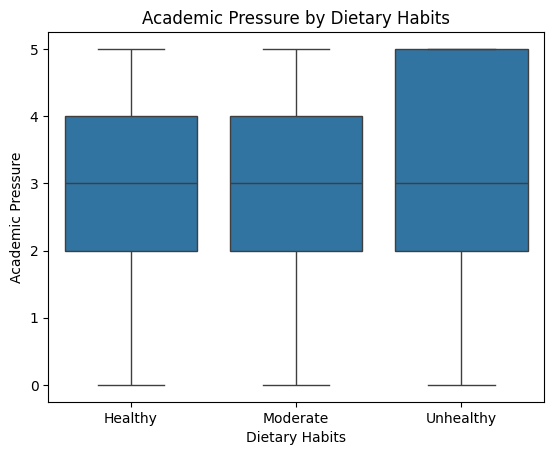

In [56]:
#set up new dataframe for the context of this question
diet_df = new_df[new_df['Dietary Habits'] != 'Others'].copy()
diet_df = diet_df.dropna(subset=['Dietary Habits', 'Academic Pressure'])
diet_df = diet_df.rename(columns={"Dietary Habits": "DietaryHabits", "Academic Pressure": "AcademicPressure"})

#anova test
model = smf.ols('AcademicPressure ~ C(DietaryHabits)', data=diet_df).fit()
anova = anova_lm(model, typ=2)
display(anova)

#anova box plot
sns.boxplot(x='DietaryHabits', y='AcademicPressure', data=diet_df)
plt.title("Academic Pressure by Dietary Habits")
plt.xlabel("Dietary Habits")
plt.ylabel("Academic Pressure")
plt.show()

**ANOVA RESULTS**

The F-value being 117.525 and the p-value being <0.001 indictates that there is a signifcant difference in dietary habits and academic pressure between the dietary habit groups. As seen in the box plot, students in the Unhealthy dietary group tend to report higher levels of academic pressure compared to those in the Moderate and Healthy groups. This is seen by the upper quartile being 5 whereas for Healthy and Moderate it is 4.

This leads us to reject the null hypotehsis that there is not a correlation between dietary habits and academic pressure.

To further investigate these disparities, a post-hoc Tukey's HSD will be performed to determine the differences between each specific dietary group.

group1,group2,meandiff,p-adj,lower,upper,reject
Healthy,Moderate,0.0969,0.0,0.0359,0.1579,True
Healthy,Unhealthy,0.3042,0.0,0.2437,0.3647,True
Moderate,Unhealthy,0.2073,0.0,0.1509,0.2637,True


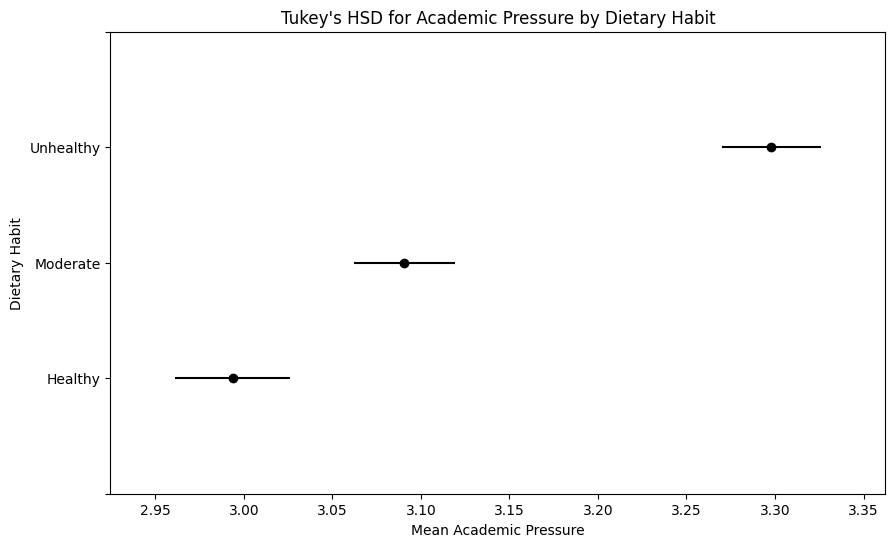

In [57]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

#tukeyHSD
tukey = pairwise_tukeyhsd(diet_df['AcademicPressure'], diet_df['DietaryHabits'], alpha=0.01)
display(tukey.summary())

#tukey plot
tukey.plot_simultaneous()
plt.title("Tukey's HSD for Academic Pressure by Dietary Habit")
plt.xlabel("Mean Academic Pressure")
plt.ylabel("Dietary Habit")
plt.show()

**TUKEY PLOT**

As seen in the above plot, the mean academic pressure is different for each dietary group. The mean difference between the Moderate and Healthy groups is smaller than the difference between Healthy or Moderate and Unhealthy. The horizontal bars around each of the three points represents a 99% confidence interval. Since none of these bars overlap, it is suggested that there is a statistically significant difference in the acerage academic pressure. This visually reinforces the earlier results shown by the ANOVA test, providing additional evidence to reject the null hypothesis in favor of the alternative hypothesis.

# **Primary analysis**

Based on the questions posed in the introduction — particularly our goal of identifying whether a student is likely to experience depression based on features such as sleep duration, academic pressure, financial stress, and dietary habits — we selected a supervised classification approach. Since our target variable, Depression, is categorical (typically encoded as 0 = No, 1 = Yes), classification algorithms are the most appropriate.

We explored several classification models, including:

Logistic Regression – for its interpretability and performance with binary targets.

Random Forest – for its ability to handle non-linear relationships and rank feature importance.

K-Nearest Neighbors (KNN) – to leverage similarity between students.
Decision Tree – for its visual and intuitive decision rules.
This approach allows us not only to predict the likelihood of depression but also to understand which factors contribute most to that risk — offering both predictive and explanatory value.


In this step, we manually encode categorical features using dictionary mappings.

We convert the 'Sleep Duration' and 'Dietary Habits' columns to numerical values to make them compatible with machine learning models.
We also drop any rows containing missing values to ensure clean data for training.

In [58]:
# Manual mapping (label encoding style)

new_df['Sleep Duration'] = new_df['Sleep Duration'].str.replace("'", '')
new_df['Dietary Habits'] = new_df['Dietary Habits'].str.replace("'", '')


sleep_map = {
    'Less than 5 hours': 0,
    '5-6 hours': 1,
    '7-8 hours': 2,
    'More than 8 hours': 3
}

diet_map = {
    'Unhealthy': 0,
    'Moderate': 1,
    'Healthy': 2
}

# Apply mappings
new_df['Sleep Duration'] = new_df['Sleep Duration'].map(sleep_map)
new_df['Dietary Habits'] = new_df['Dietary Habits'].map(diet_map)

print(new_df.dtypes)

new_df = new_df.dropna()

id                                         int64
Gender                                    object
Age                                      float64
City                                      object
Profession                                object
Academic Pressure                        float64
Work Pressure                            float64
CGPA                                     float64
Study Satisfaction                       float64
Job Satisfaction                         float64
Sleep Duration                           float64
Dietary Habits                           float64
Degree                                    object
Have you ever had suicidal thoughts ?     object
Work/Study Hours                         float64
Financial Stress                          object
Family History of Mental Illness          object
Depression                                 int64
dtype: object




We define the input features (`X`) and the target variable (`Y`).
The features include sleep, work habits, academic pressure, CGPA, and more.
The target variable is 'Depression', which we aim to predict using machine learning models.


In [59]:
# Initialize X and Y

X = new_df[['Sleep Duration','Work/Study Hours','Dietary Habits','Academic Pressure','CGPA','Financial Stress','Family History of Mental Illness']]
Y = new_df['Depression']


print(X.head())
print(Y.head())


   Sleep Duration  Work/Study Hours  Dietary Habits  Academic Pressure  CGPA  \
0             1.0               3.0             2.0                5.0  8.97   
1             1.0               3.0             1.0                2.0  5.90   
2             0.0               9.0             2.0                3.0  7.03   
3             2.0               4.0             1.0                3.0  5.59   
4             1.0               1.0             1.0                4.0  8.13   

  Financial Stress Family History of Mental Illness  
0              1.0                    0              
1              2.0                    1              
2              1.0                    1              
3              5.0                    1              
4              1.0                    0              
0    1
1    0
2    0
3    1
4    0
Name: Depression, dtype: int64



We split the dataset into training and testing sets using an 80/20 split.
Then, we scale the features using `StandardScaler` to normalize the data —
this improves model performance, especially for distance-based algorithms like KNN.

In [60]:
seed = 42
test_size = 0.2

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(pd.DataFrame(X_train_scaled).isnull().sum())


0    0
1    0
2    0
3    0
4    0
5    0
6    0
dtype: int64


We define a dictionary of machine learning models to evaluate:
- K-Nearest Neighbors (KNN)
- Decision Tree
- Logistic Regression
- Random Forest

This setup allows us to train and compare multiple models in a consistent manner.Then We perform 5-fold Stratified Cross-Validation on each model to assess generalization performance and reduce overfitting. It gives us a more reliable estimate of accuracy across different data splits.

In [61]:
models = {
    'KNN' : KNeighborsClassifier(),
    'DecisionTree'        : DecisionTreeClassifier(random_state=seed),
    'Logistic Regression' : LogisticRegression(max_iter=1000, random_state=seed),
    'Random Forest'       : RandomForestClassifier(random_state=seed)
    }

# Perform k-fold Cross-Validation for each model
k_folds = 5
skf = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=seed)
results = {} #for boxplot

for model_name, model in models.items():
    np.random.seed(42)
    print(f"Model: {model_name}")

    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=skf, scoring="accuracy")
    results[model_name] = cv_scores
    print(f"Cross-validated Accuracy: {cv_scores.mean():.5f} (+/- {  cv_scores.std():.5f})")


Model: KNN
Cross-validated Accuracy: 0.75154 (+/- 0.00577)
Model: DecisionTree
Cross-validated Accuracy: 0.68948 (+/- 0.00636)
Model: Logistic Regression
Cross-validated Accuracy: 0.78387 (+/- 0.00547)
Model: Random Forest
Cross-validated Accuracy: 0.74494 (+/- 0.00653)


Each machine learning model is trained on the scaled training data.
This prepares the models for evaluation on the unseen test set.

Finally, we evaluate the trained models on the test data using Accuracy score and Classification reports (precision, recall, f1-score).

In [62]:
# Train each model using the training data
for model_name, model in models.items():
    # Set random seed for reproducibility
    np.random.seed(42)

    model.fit(X_train_scaled, y_train)

    top_acc = 0

# Evaluate the performance of each model
for model_name, model in models.items():
    np.random.seed(42)


    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)

    if (accuracy > top_acc):
        top_acc = accuracy
        best_model = model

    print(f"Accuracy of {model_name}: {accuracy:.3f}")
    print(classification_report(y_test, y_pred, zero_division=0))



Accuracy of KNN: 0.751
              precision    recall  f1-score   support

           0       0.72      0.67      0.69      2329
           1       0.77      0.81      0.79      3239

    accuracy                           0.75      5568
   macro avg       0.75      0.74      0.74      5568
weighted avg       0.75      0.75      0.75      5568

Accuracy of DecisionTree: 0.706
              precision    recall  f1-score   support

           0       0.64      0.66      0.65      2329
           1       0.75      0.74      0.74      3239

    accuracy                           0.71      5568
   macro avg       0.70      0.70      0.70      5568
weighted avg       0.71      0.71      0.71      5568

Accuracy of Logistic Regression: 0.784
              precision    recall  f1-score   support

           0       0.77      0.70      0.73      2329
           1       0.80      0.85      0.82      3239

    accuracy                           0.78      5568
   macro avg       0.78      0.77 

In [63]:
# Extract the feature importances from Random Forest model

best_model

importances = models['Random Forest'].feature_importances_



# Creating a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({"features": X.columns, "importances" : importances
                                      }).sort_values('importances',ascending=False)


# Displaying feature importances
print("Feature Importances:")

feature_importance_df


Feature Importances:


,features,importances
4,CGPA,0.353694
3,Academic Pressure,0.228799
1,Work/Study Hours,0.150869
5,Financial Stress,0.134833
0,Sleep Duration,0.059516
2,Dietary Habits,0.049513
6,Family History o...,0.022776


# **Visualization**



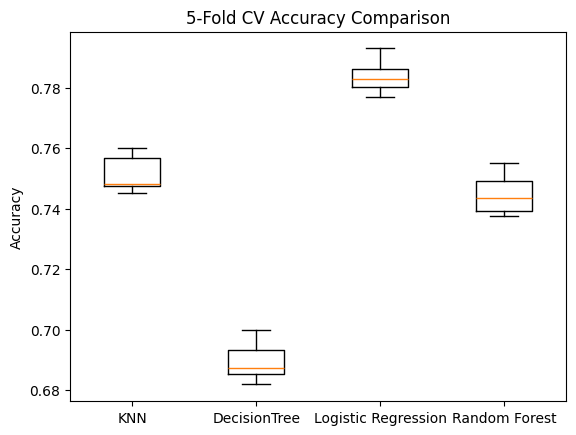

In [64]:
plt.boxplot(list(results.values()), tick_labels=list(results.keys()))
plt.ylabel('Accuracy')
plt.title('5-Fold CV Accuracy Comparison')
plt.show()

Out of the 4 models tested, Logistic Regression was the most accurate and effective model. It had only a marginal increase in accuracy, compared to the other 3 models but had the highest precision, recall, and f1-score.

Logistic Regression accuracy = 0.78387 ± 0.00547

KNN accuracy = 0.75154 ± 0.00577

Random Forest accuracy = 0.74494 ± 0.00653

Decision Tree accuracy = 0.68948 ± 0.00636

As shown in the "5-Fold CV Accuracy Comparison" plot, this is not due to simply random noise. Even in the low end, Logistic Regression still outperforms the other 3 models.

The most important statistic that Logistic Regression does well with is the recall value of 0.85. The reason that this statistic is the most important is because missing a depressed student from a false negative should be prioritized over an occasional false alarm from a false positive. This is often the case with many illness related statistics.



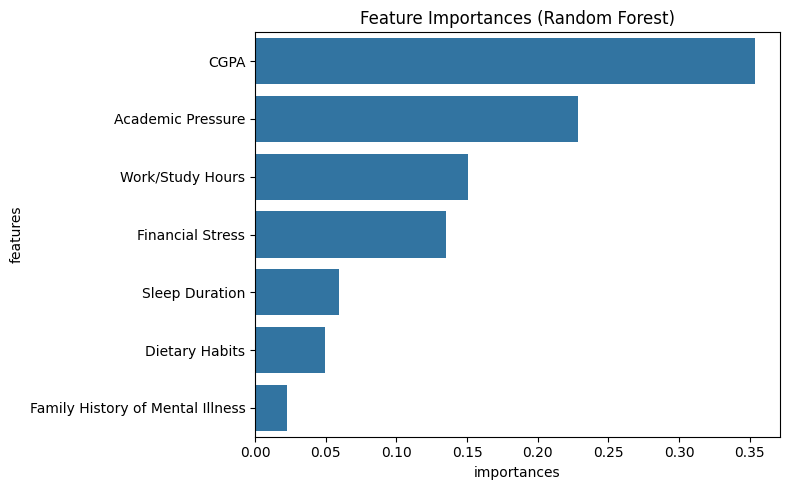

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.barplot(x="importances", y="features", data=feature_importance_df)
plt.title("Feature Importances (Random Forest)")
plt.tight_layout()
plt.show()

The feature importance plot from the Random Forest model shows that CGPA, academic pressure, and work/study hours are the most influential factors in predicting student depression. This suggests that academic performance and stress play a key role in students' mental health. Financial stress also has a noticeable impact, while lifestyle factors like sleep duration and dietary habits contribute to a lesser extent. Interestingly, family history of mental illness had the least importance in this model. Overall, academic-related pressures appear to be the primary drivers of depression risk in this dataset.

# **Insights and Conclusions**

<br> Our exploration of the Student Mental Health dataset revealed meaningful patterns linking lifestyle habits with reported depression among students. <br> <br> **Key insights include:** <br>
<br>Sleep Duration: A Chi-Squared test revealed a statistically significant relationship between how long students sleep and their likelihood of experiencing depression. Students with very short or irregular sleep schedules tended to report higher rates of depression.
<br> <br>Work/Study Hours: Through a t-test, we found that students with longer daily study or work hours were more likely to report depression symptoms, suggesting academic workload may contribute to mental health struggles.
<br> <br>Diet and Academic Pressure: An ANOVA test followed by a Post-Hoc Tukey HSD analysis showed dietary habits varied significantly across different levels of academic pressure. This suggests that poor dietary routines could be a side effect of high academic stress.
<br> <br>On the machine learning side, we developed classification models using features identified during our analysis (e.g., sleep, diet, work hours) to predict depression. Among the tested models, Logistic Regression performed best, as indicated by our 5-Fold Cross-Validation Accuracy Comparison. When analyzing the Random Forest model's feature importances, the three most influential features for classification were *CGPA*, *academic pressure*, and *study hours*. These features contributed the most to creating pure groups across the tree-based model. In other words, they form the clearest splits between depressed and non-depressed students.
<br><br>**Final Thoughts**<br> <br>
 Overall, this project effectively informs both unfamiliar and knowledgeable audiences about the relationship between student lifestyle factors and mental health. For readers new to the topic, the introduction offers accessible context and the analysis clearly demonstrates how habits like sleep duration, work hours, and diet correlate with depression. The use of straightforward statistical tests and clear visualizations make the findings digestable. For readers already familiar with mental health research, the project adds value by applying multiple statistical techniques and machine learning models to uncover predictive patterns in the data. The exploration of feature importance and the use of cross-validation enhance the depth. While there is room to further discuss limitations and expand on model evaluation, the analysis successfully deepens understanding of how behavioral data can be used to monitor and predict mental health outcomes. In doing so, the project not only raises awareness but also contributes informative insights.